<a href="https://colab.research.google.com/github/King-of-Haskul/Machine-Learning-And-Data-Science/blob/main/RNN_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Numpy implementation of a simple RNN

In [6]:
import numpy as np

timesteps = 100  #number of timesteps in the input sequence
input_features = 32  #Dimensionality of the input feature space
output_features = 64  #Dimensionality of the output feature space

inputs = np.random.random((timesteps, input_features))  #Input data: random noise for the sake of the example

state_t = np.zeros((output_features, )) #Initial state: an all-zero vector

#Inititializing ranodm weight matrcies
W = np.random.random((output_features, input_features)) 
U = np.random.random((output_features, output_features))
b = np.random.random((output_features, ))

successive_outputs = []
for input_t in inputs:   #input_t is a vector of shape(input_features, )
  output_t = np.tanh(np.dot(W, input_t) + np.dot(U, state_t) + b)

  successive_outputs.append(output_t)

  state_t = output_t

final_output_sequence = np.concatenate(successive_outputs, axis = 0) #The final output is a 2D tensor of shape (timestaps, output_features) 

### Recurrent layer in Keras

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN

model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 32)          320000    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 32)                2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [10]:
#Model that returns the full state sequence: shape (batch_size, timestaps, output_features)
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, None, 32)          2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


#### Stacking several recurrent layers



In [12]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True)) #All of the intermediate recurrent layers must return full sequences so as to stack them
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_6 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_7 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_8 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_9 (SimpleRNN)     (None, 32)                2080      
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


### Using Simple RNN on the IMDB movie-review-classification problem

In [14]:
#Preprocessing IMDB data
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

max_features = 10000 #Number of words to consider as features
maxlen = 500         #Cuts off texts after this many words (among the max_features most common words)
batch_size = 32

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words = max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape: ', input_train.shape)
print('input_test shape: ', input_test.shape)

Loading data...


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape:  (25000, 500)
input_test shape:  (25000, 500)


In [17]:
#Training the model with Embedding and SimpleRNN layers
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(input_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 25s 149ms/step - loss: 0.6428 - accuracy: 0.6228 - val_loss: 0.5005 - val_accuracy: 0.7892
Epoch 2/10
157/157 [==============================] - 23s 144ms/step - loss: 0.4173 - accuracy: 0.8205 - val_loss: 0.4209 - val_accuracy: 0.8242
Epoch 3/10
157/157 [==============================] - 23s 144ms/step - loss: 0.3086 - accuracy: 0.8728 - val_loss: 0.4341 - val_accuracy: 0.7980
Epoch 4/10
157/157 [==============================] - 22s 143ms/step - loss: 0.2377 - accuracy: 0.9097 - val_loss: 0.3980 - val_accuracy: 0.8422
Epoch 5/10
157/157 [==============================] - 22s 143ms/step - loss: 0.1814 - accuracy: 0.9319 - val_loss: 0.4013 - val_accuracy: 0.8348
Epoch 6/10
157/157 [==============================] - 23s 144ms/step - loss: 0.1375 - accuracy: 0.9504 - val_loss: 0.5381 - val_accuracy: 0.7748
Epoch 7/10
157/157 [==============================] - 22s 143ms/step - loss: 0.0947 - accuracy: 0.9680 - val_loss: 0.4870 - val_ac

In [21]:
#Plotting results
import matplotlib.pyplot as plt
def plot_results(history):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(1, len(acc) + 1)

  plt.plot(epochs, acc, 'bo', label='Training accuracy')
  plt.plot(epochs, val_acc, 'b', label='Validaiton accuracy')
  plt.title('Training and Vaidation accuracy')
  plt.legend()

  plt.figure()

  plt.plot(epochs, loss, 'bo', label='Training loss')
  plt.plot(epochs, val_loss, 'b', label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend()

  plt.show()

### LSTM layer (Long short term Memory)

In [20]:
from tensorflow.keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(input_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 52s 319ms/step - loss: 0.4940 - accuracy: 0.7663 - val_loss: 0.3750 - val_accuracy: 0.8414
Epoch 2/10
157/157 [==============================] - 50s 316ms/step - loss: 0.2831 - accuracy: 0.8882 - val_loss: 0.2807 - val_accuracy: 0.8924
Epoch 3/10
157/157 [==============================] - 50s 317ms/step - loss: 0.2295 - accuracy: 0.9132 - val_loss: 0.3544 - val_accuracy: 0.8492
Epoch 4/10
157/157 [==============================] - 50s 317ms/step - loss: 0.2019 - accuracy: 0.9251 - val_loss: 0.2905 - val_accuracy: 0.8756
Epoch 5/10
157/157 [==============================] - 51s 322ms/step - loss: 0.1720 - accuracy: 0.9400 - val_loss: 0.3419 - val_accuracy: 0.8890
Epoch 6/10
157/157 [==============================] - 51s 325ms/step - loss: 0.1629 - accuracy: 0.9403 - val_loss: 0.3152 - val_accuracy: 0.8730
Epoch 7/10
157/157 [==============================] - 51s 326ms/step - loss: 0.1432 - accuracy: 0.9488 - val_loss: 0.4056 - val_ac

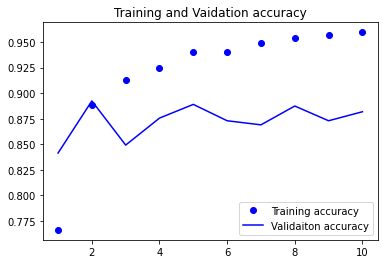

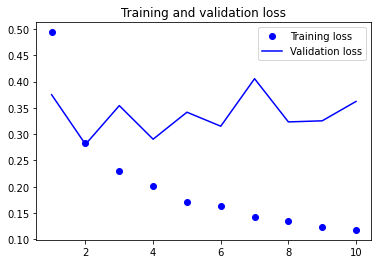

In [22]:
plot_results(history)